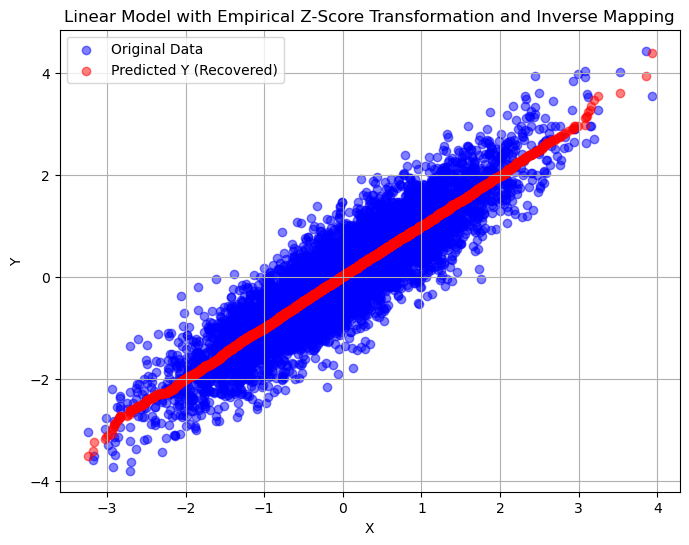

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rankdata, norm

# Set random seed for reproducibility
np.random.seed(42)

# Generate random normal distributed x with mean=0 and std=1
x = np.random.normal(loc=0, scale=1, size=7000)

# Generate random normal distributed b with mean=0 and std=0.5
b = np.random.normal(loc=0, scale=0.5, size=7000)

# Define linear model y = ax + b where a = 1
a = 1
y = a * x + b

# Compute ECDF-based percentiles
def ecdf_percentiles(data):
    return rankdata(data) / (len(data) + 0.01)  # Avoid 0 and 1 percentiles

# Compute empirical z-scores from percentiles
def empirical_zscore_from_percentile(percentiles):
    percentiles = np.clip(percentiles, 1e-6, 1 - 1e-6)  # Clip to avoid NaNs
    return norm.ppf(percentiles)  # Use the inverse CDF (percent-point function) from scipy

# Convert empirical z-score back to percentile
def percentile_from_zscore(z_scores):
    return norm.cdf(z_scores)  # Use the CDF from scipy

# Convert percentile back to actual data using inverse ECDF
def inverse_ecdf(percentiles, data):
    sorted_data = np.sort(data)
    return np.interp(percentiles, np.linspace(0, 1, len(sorted_data)), sorted_data)

# Step 1: Convert x and y to their ECDF percentiles
x_percentile = ecdf_percentiles(x)
y_percentile = ecdf_percentiles(y)

# Step 2: Convert percentiles to empirical z-scores
x_zscore = empirical_zscore_from_percentile(x_percentile)
y_zscore = empirical_zscore_from_percentile(y_percentile)

# Remove any NaN values from the dataset
mask = ~np.isnan(x_zscore) & ~np.isnan(y_zscore)
x_zscore = x_zscore[mask]
y_zscore = y_zscore[mask]

# Step 3: Fit a linear model between empirical z-scores
coeffs = np.polyfit(x_zscore, y_zscore, 1)
predicted_y_zscore = np.polyval(coeffs, x_zscore)

# Step 4: Convert predicted y's z-score back to percentile
predicted_y_percentile = percentile_from_zscore(predicted_y_zscore)

# Step 5: Convert percentiles back to actual y values
predicted_y_actual = inverse_ecdf(predicted_y_percentile, y)

# Plot the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5, label="Original Data", color='blue')
plt.scatter(x[mask], predicted_y_actual, alpha=0.5, label="Predicted Y (Recovered)", color='red')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear Model with Empirical Z-Score Transformation and Inverse Mapping")
plt.legend()
plt.grid(True)
plt.show()

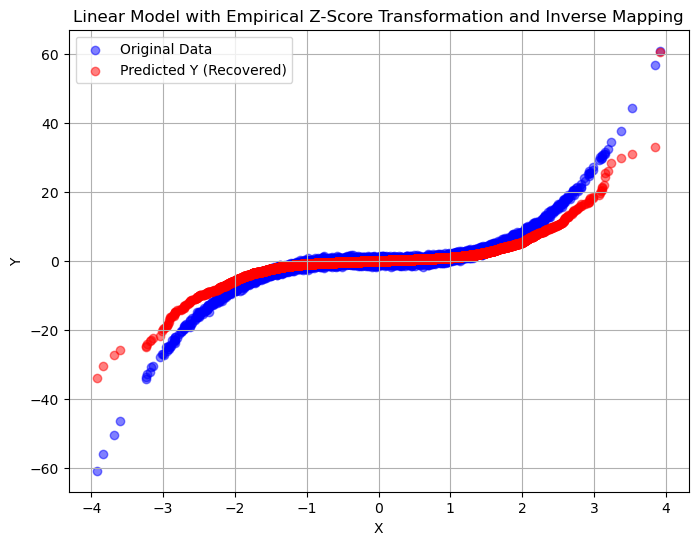

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rankdata, norm

# Set random seed for reproducibility
np.random.seed(42)

# Generate random normal distributed x with mean=0 and std=1
x = np.random.normal(loc=0, scale=1, size=10000)

# Generate random normal distributed b with mean=0 and std=0.5
b = np.random.normal(loc=0, scale=0.5, size=10000)

# Define linear model y = ax + b where a = 1
a = 1
y = a * x**3 + b

# Compute ECDF-based percentiles
def ecdf_percentiles(data):
    return rankdata(data) / (len(data) + 0.01)  # Avoid 0 and 1 percentiles

# Compute empirical z-scores from percentiles
def empirical_zscore_from_percentile(percentiles):
    percentiles = np.clip(percentiles, 1e-6, 1 - 1e-6)  # Clip to avoid NaNs
    return norm.ppf(percentiles)  # Use the inverse CDF (percent-point function) from scipy

# Convert empirical z-score back to percentile
def percentile_from_zscore(z_scores):
    return norm.cdf(z_scores)  # Use the CDF from scipy

# Convert percentile back to actual data using inverse ECDF
def inverse_ecdf(percentiles, data):
    sorted_data = np.sort(data)
    return np.interp(percentiles, np.linspace(0, 1, len(sorted_data)), sorted_data)

# Step 1: Convert x and y to their ECDF percentiles
x_percentile = ecdf_percentiles(x)
y_percentile = ecdf_percentiles(y)

# Step 2: Convert percentiles to empirical z-scores
x_zscore = empirical_zscore_from_percentile(x_percentile)
y_zscore = empirical_zscore_from_percentile(y_percentile)

# Remove any NaN values from the dataset
mask = ~np.isnan(x_zscore) & ~np.isnan(y_zscore)
x_zscore = x_zscore[mask]
y_zscore = y_zscore[mask]

# Step 3: Fit a linear model between empirical z-scores
coeffs = np.polyfit(x_zscore, y_zscore, 1)
predicted_y_zscore = np.polyval(coeffs, x_zscore)

# Step 4: Convert predicted y's z-score back to percentile
predicted_y_percentile = percentile_from_zscore(predicted_y_zscore)

# Step 5: Convert percentiles back to actual y values
predicted_y_actual = inverse_ecdf(predicted_y_percentile, y)

# Plot the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5, label="Original Data", color='blue')
plt.scatter(x[mask], predicted_y_actual, alpha=0.5, label="Predicted Y (Recovered)", color='red')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear Model with Empirical Z-Score Transformation and Inverse Mapping")
plt.legend()
plt.grid(True)
plt.show()

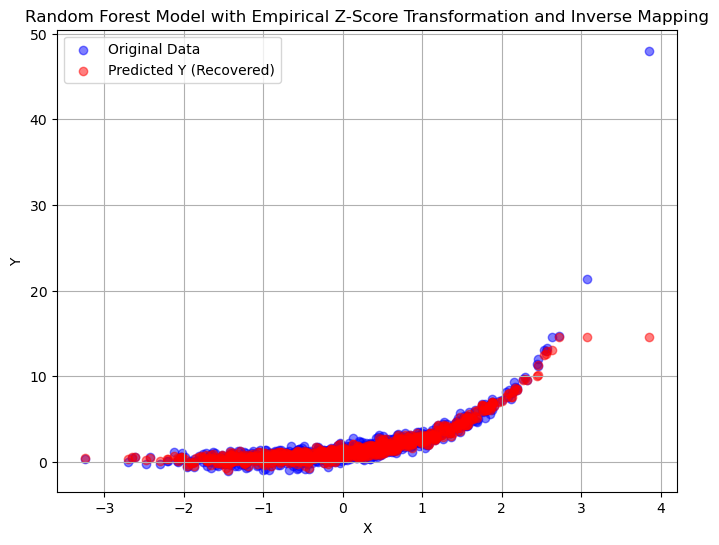

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rankdata, norm
from sklearn.ensemble import RandomForestRegressor

# Set random seed for reproducibility
np.random.seed(42)

# Generate random normal distributed x with mean=0 and std=1
x = np.random.normal(loc=0, scale=1, size=1000)

# Generate random normal distributed b with mean=0 and std=0.5
b = np.random.normal(loc=0, scale=0.5, size=1000)

# Define linear model y = ax + b where a = 1
a = 1
y = a * np.exp(x) + b

# Compute ECDF-based percentiles
def ecdf_percentiles(data):
    return rankdata(data) / (len(data) + 1)  # Avoid 0 and 1 percentiles

# Compute empirical z-scores from percentiles
def empirical_zscore_from_percentile(percentiles):
    percentiles = np.clip(percentiles, 1e-6, 1 - 1e-6)  # Clip to avoid NaNs
    return norm.ppf(percentiles)  # Use the inverse CDF (percent-point function) from scipy

# Convert empirical z-score back to percentile
def percentile_from_zscore(z_scores):
    return norm.cdf(z_scores)  # Use the CDF from scipy

# Convert percentile back to actual data using inverse ECDF
def inverse_ecdf(percentiles, data):
    sorted_data = np.sort(data)
    return np.interp(percentiles, np.linspace(0, 1, len(sorted_data)), sorted_data)

# Step 1: Convert x and y to their ECDF percentiles
x_percentile = ecdf_percentiles(x)
y_percentile = ecdf_percentiles(y)

# Step 2: Convert percentiles to empirical z-scores
x_zscore = empirical_zscore_from_percentile(x_percentile)
y_zscore = empirical_zscore_from_percentile(y_percentile)

# Remove any NaN values from the dataset
mask = ~np.isnan(x_zscore) & ~np.isnan(y_zscore)
x_zscore = x_zscore[mask].reshape(-1, 1)
y_zscore = y_zscore[mask]

# Step 3: Fit a Random Forest model between empirical z-scores
rf_model = RandomForestRegressor(n_estimators=5, random_state=42)
rf_model.fit(x_zscore, y_zscore)
predicted_y_zscore = rf_model.predict(x_zscore)

# Step 4: Convert predicted y's z-score back to percentile
predicted_y_percentile = percentile_from_zscore(predicted_y_zscore)

# Step 5: Convert percentiles back to actual y values
predicted_y_actual = inverse_ecdf(predicted_y_percentile, y)

# Plot the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5, label="Original Data", color='blue')
plt.scatter(x[mask.flatten()], predicted_y_actual, alpha=0.5, label="Predicted Y (Recovered)", color='red')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Random Forest Model with Empirical Z-Score Transformation and Inverse Mapping")
plt.legend()
plt.grid(True)
plt.show()